In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt


1.

In [237]:
data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')       # fn to read csv files
display(data)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


2. (c)

In [238]:
 #printing uniqe values of genotype
print(data['Genotype'].unique())

# showing values and comparing                                             
print(data['Genotype'].value_counts())

#printing uniqe values of treatment_behaviour
print(data['Treatment_Behavior'].unique())     

#showing values and comparing
print(data['Treatment_Behavior'].value_counts())                                  


['Control' 'Ts65Dn']
Control    435
Ts65Dn     327
Name: Genotype, dtype: int64
['Memantine_C/S' 'Memantine_S/C' 'Saline_C/S' 'Saline_S/C']
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64


In [239]:
# target is genotype target
target = data.loc[ :, 'Genotype']

# treat_behav is data of treatment_behavior
treat_behav = data.loc[:, 'Treatment_Behavior']

# will store 1, 0 in order: ['Memantine_C/S' 'Memantine_S/C' 'Saline_C/S' 'Saline_S/C']
trt_behav = np.zeros((4, 762))
for i in range(762):
  if treat_behav[i] == 'Memantine_C/S':
    trt_behav[0][i] = 1
  if treat_behav[i] == 'Memantine_S/C':
    trt_behav[1][i] = 1
  if treat_behav[i] == 'Saline_C/S':
    trt_behav[2][i] = 1
  if treat_behav[i] == 'Saline_S/C':
    trt_behav[3][i] = 1
  
dataframe = data



In [240]:
deco = [ ]

In [241]:
# removing feature which have significant NaN, values

for col in dataframe.columns.values:
  list_val = dataframe[col].unique()
  
  if len(list_val) < 650:
    print(col)
    deco.append(col)


for col in deco:
  dataframe.pop(col)
feature_names = dataframe.columns
display( dataframe )
  # print(col + ' is of type  ' + str(data[col].dtypes) + ', has ' + str(len(list_val)) + ' unique values, and ' )

BAD_N
BCL2_N
H3AcK18_N
EGR1_N
H3MeK4_N
Genotype
Treatment_Behavior


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.119428,0.115567,0.441207,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.118081,0.108944,0.444913,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.116134,0.114635,0.422789,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.120649,0.459901,1.543274


In [242]:
# for col in dataframe.columns.values:                                          # plotting histogram of data
#   plt.hist(dataframe[col])
#   plt.xlabel(col)
#   plt.show()

In [243]:
# seeing various things about features

data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,702.000000,762.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,1.533411,2.249525,0.160206,1.234311,0.846778,0.226365,0.122095,0.129689,0.450260,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.248073,0.264663,0.024919,0.172950,0.096287,0.029564,0.014928,0.022832,0.062304,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.853176,1.206098,0.101233,0.750664,0.577397,0.162642,0.067254,0.085419,0.258626,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,1.355712,2.086194,0.142209,1.114087,0.798404,0.205750,0.110655,0.111676,0.407385,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,1.521407,2.257591,0.158843,1.216288,0.849858,0.224439,0.122600,0.126138,0.450500,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,1.707125,2.443635,0.174922,1.368873,0.916476,0.241714,0.133617,0.142831,0.488438,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,2.586216,2.877873,0.251220,1.897202,1.204598,0.358289,0.158748,0.210908,0.759588,2.129791


3.

In [244]:
# code for imputing NaN values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# using iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)
# transforming dataframe to df
df = imp.fit_transform(dataframe)

In [245]:
# dataframe is now our training data
dataframe = pd.DataFrame(df, columns = feature_names)

In [246]:
# pd.plotting.scatter_matrix(dataframe, alpha = 0.2, figsize = (26,26))


2. (b)

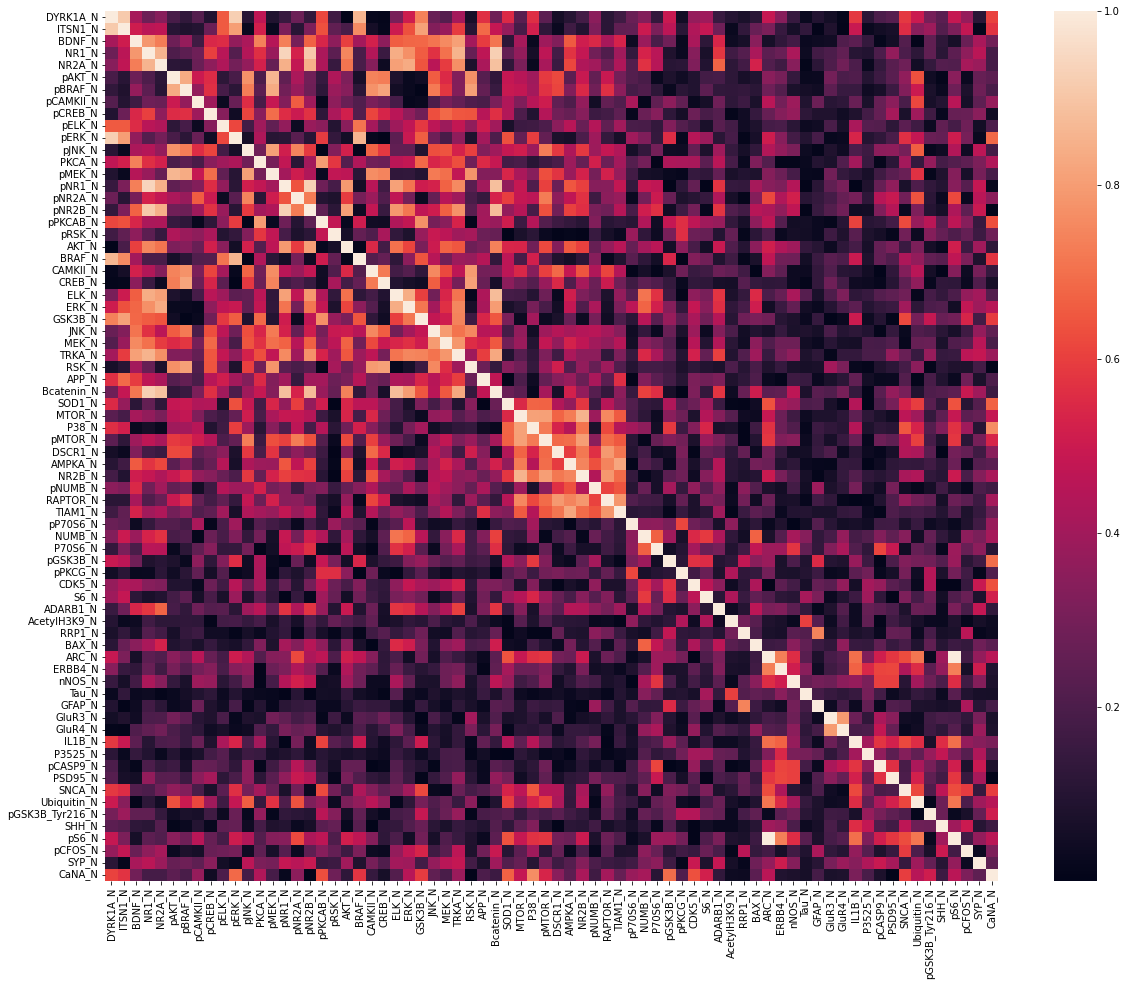

In [247]:
# dirrectly using corr function to calculate correlation between variables
corr_matrix = dataframe.corr(method = 'spearman')


fig, ax = plt.subplots(figsize=(20, 16))

sns.heatmap(abs(corr_matrix), annot = False)

plt.show()

2(a)

In [248]:
del_col = [ ]

In [249]:
# update the del_col
#traversing in corr_matrix
def remove_correlated_matrix(dataframe, del_col):
  for col1 in dataframe.columns.values:
     for col2 in dataframe.columns.values:

# if correlation between columns is bigger than 0.9 then 
       if abs(corr_matrix[col1][col2]) >= 0.9 :
          
          
          # removing that column which has low variance
          if dataframe[col1].var() > dataframe[col2].var():
            col = col1
          else:
            col = col2
          if col1 != col2 :
            if col not in del_col:

              # appending that to delete column
              del_col.append(col)

              if col == col1:
                    break
              if col == col2:
                    continue
  print(del_col)                  
  for coly in del_col:
     dataframe.pop(coly)
   



remove_correlated_matrix(dataframe, del_col)
print(del_col)
# removing highly correleted matrix




['DYRK1A_N', 'NR1_N', 'pERK_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N', 'ARC_N']
['DYRK1A_N', 'NR1_N', 'pERK_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N', 'ARC_N']


In [250]:
# putting column names with lots of NaN values to del_col
for col in deco:
  if col not in del_col:
    del_col.append(col)

print(del_col)

['DYRK1A_N', 'NR1_N', 'pERK_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N', 'ARC_N', 'BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'Genotype', 'Treatment_Behavior']


In [251]:
# in this part we remove values with very low variance

#calculating variances
variance = dataframe.var()

# store column names in this list, then push these to del_col
del_varcol = [ ]

for col in dataframe.columns.values:
  if variance[col] <= 0.001:
    del_varcol.append(col)

# pushing to del_col and popping columns from dataframe
for col in del_varcol:
  if col not in del_col: 
    del_col.append(col)
    dataframe.pop(col)

# final lenght of del_col
print(len(del_col))

29


In [252]:
# changing  class to 1, 0s
for i in range(len(target)):
  if target[i] == 'Control':
    target[i] = 1
  else:
    target[i] = 0



4.

# 6.

here i made function imp_features which will show importance of feature, this code is used below at Ques 5., as it was easy to show important features there only or i had to fit model again in question 6.

In [253]:
def imp_feature(grid, X, y):
 # importing permutation_importance
 from sklearn.inspection import permutation_importance

 #fitting model for which you want to predict
 grid.fit(X,y)

 # result is feature importance
 result = permutation_importance(grid, X, y)

 names = X.columns

 names = names.to_numpy()

 names = np.array(names)

 # sorting index wrt importance of features
 sorted_idx = result.importances_mean.argsort()

 # plotting horizontal bar graph of features with importance
 plt.figure(figsize=(20,12))
 plt.barh(names[sorted_idx], result.importances_mean[sorted_idx])
 plt.show()

# 7

for similar reason as above result of part 7 will be below

In [254]:
# ths function will give new x with reduced features and 
def rem_sym_features(X, y, model):

 # importing recursive feature elimination with cross validation 
 from sklearn.feature_selection import RFECV

 result = RFECV(model, step=1, cv=5)
 result.fit(X, y)

 # this is transformed X
 new_X = result.transform(X)
 return new_X

# 8. 

In [255]:
# in this block we use previous methord to make testing data suitable to pass into our function and test on the data
data_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')
target_test = data_test.loc[ :, 'Genotype']
df_t = data_test



print(del_col)
for col in del_col:
       df_t.pop(col)

display(df_t)
names = df_t.columns

# using iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)
# transforming dataframe to df
df = imp.fit_transform(df_t)
df_test = pd.DataFrame(df, columns = names)
# making target to 0,1
for i in range(len(target_test)):

  if target_test[i] == 'Control':
    target_test[i] = 1
  else:
    target_test[i] = 0

# displaying dataset with eliminated variables
display(target_test)
dataset1_test = df_test
dataset1_test['target'] = target_test 
display(dataset1_test)


['DYRK1A_N', 'NR1_N', 'pERK_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N', 'ARC_N', 'BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'Genotype', 'Treatment_Behavior', 'pBRAF_N', 'pCREB_N', 'CREB_N', 'RSK_N', 'NUMB_N', 'pGSK3B_N', 'BAX_N', 'ERBB4_N', 'nNOS_N', 'GFAP_N', 'GluR4_N', 'P3525_N', 'SNCA_N', 'SHH_N', 'pCFOS_N']


,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,...,RRP1_N,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N
0,0.954187,0.446958,5.915039,0.197897,1.765115,1.808111,0.348667,0.348291,0.245963,1.083177,...,0.150501,0.353719,0.220791,0.571351,1.788785,2.221383,1.180117,0.833704,0.541241,1.649983
1,0.962021,0.464964,5.975028,0.202810,1.807824,1.960691,0.353874,0.362704,0.260634,1.122294,...,0.158657,0.343087,0.215580,0.569082,1.763879,2.215774,1.066127,0.838388,0.525966,1.638988
2,0.967179,0.470056,5.927379,0.205131,1.783552,2.147883,0.361690,0.368386,0.259549,1.135150,...,0.168043,0.335484,0.200900,0.537034,1.672823,2.098199,1.063393,0.806386,0.508214,1.564925
3,0.812018,0.393465,5.808102,0.218211,2.312324,1.733692,0.337290,0.335699,0.250643,0.959980,...,0.156875,0.292974,0.207313,0.571438,1.651346,2.207185,1.291057,0.844211,0.561721,1.682222
4,0.863728,0.411203,6.006657,0.223688,2.375283,1.843255,0.348531,0.354685,0.270284,1.006154,...,0.166624,0.301951,0.207108,0.559934,1.629055,2.212114,1.157121,0.854093,0.534845,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.395432,0.248694,1.860128,0.188536,2.178982,0.770115,0.234513,0.222421,0.218092,0.535005,...,0.181807,0.268631,0.231247,0.586215,1.395397,2.006332,1.156113,0.853264,0.400268,1.160740
221,0.443780,0.276658,2.256494,0.218216,2.475735,0.913363,0.264183,0.259228,0.257006,0.608681,...,0.173294,0.266825,0.224332,0.581128,1.398220,1.918932,1.124036,0.837864,0.407596,1.139347
222,0.364058,0.241693,1.737540,0.197125,1.919489,0.720767,0.223802,0.236581,0.221725,0.500160,...,0.197777,0.249543,0.230207,0.571559,1.323386,1.919458,1.174635,0.839982,0.431334,1.142205
223,0.369960,0.239036,1.814940,0.194538,1.908112,0.772530,0.222490,0.215904,0.215422,0.503454,...,0.206053,0.251976,0.234829,0.594155,1.344565,1.874310,1.157447,0.837781,0.395408,1.112718


0      1
1      1
2      1
3      1
4      1
      ..
220    0
221    0
222    0
223    0
224    0
Name: Genotype, Length: 225, dtype: object

,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,...,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N,target
0,0.954187,0.446958,5.915039,0.197897,1.765115,1.808111,0.348667,0.348291,0.245963,1.083177,...,0.353719,0.220791,0.571351,1.788785,2.221383,1.180117,0.833704,0.541241,1.649983,1
1,0.962021,0.464964,5.975028,0.202810,1.807824,1.960691,0.353874,0.362704,0.260634,1.122294,...,0.343087,0.215580,0.569082,1.763879,2.215774,1.066127,0.838388,0.525966,1.638988,1
2,0.967179,0.470056,5.927379,0.205131,1.783552,2.147883,0.361690,0.368386,0.259549,1.135150,...,0.335484,0.200900,0.537034,1.672823,2.098199,1.063393,0.806386,0.508214,1.564925,1
3,0.812018,0.393465,5.808102,0.218211,2.312324,1.733692,0.337290,0.335699,0.250643,0.959980,...,0.292974,0.207313,0.571438,1.651346,2.207185,1.291057,0.844211,0.561721,1.682222,1
4,0.863728,0.411203,6.006657,0.223688,2.375283,1.843255,0.348531,0.354685,0.270284,1.006154,...,0.301951,0.207108,0.559934,1.629055,2.212114,1.157121,0.854093,0.534845,1.660352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.395432,0.248694,1.860128,0.188536,2.178982,0.770115,0.234513,0.222421,0.218092,0.535005,...,0.268631,0.231247,0.586215,1.395397,2.006332,1.156113,0.853264,0.400268,1.160740,0
221,0.443780,0.276658,2.256494,0.218216,2.475735,0.913363,0.264183,0.259228,0.257006,0.608681,...,0.266825,0.224332,0.581128,1.398220,1.918932,1.124036,0.837864,0.407596,1.139347,0
222,0.364058,0.241693,1.737540,0.197125,1.919489,0.720767,0.223802,0.236581,0.221725,0.500160,...,0.249543,0.230207,0.571559,1.323386,1.919458,1.174635,0.839982,0.431334,1.142205,0
223,0.369960,0.239036,1.814940,0.194538,1.908112,0.772530,0.222490,0.215904,0.215422,0.503454,...,0.251976,0.234829,0.594155,1.344565,1.874310,1.157447,0.837781,0.395408,1.112718,0


# 5.

In [256]:
['Memantine_C/S' 'Memantine_S/C' 'Saline_C/S' 'Saline_S/C']

['Memantine_C/SMemantine_S/CSaline_C/SSaline_S/C']

In [257]:
# preparing dataframe for genotype as target
dataset1 = dataframe
dataset1['target'] = target 
display(dataset1)

# preparing dataframe for 'Memantine_C/S' as target

dataset_mem_cs = dataframe
dataset_mem_cs['target'] = trt_behav[0]
display(dataset_mem_cs)

# preparing dataframe for 'Memantine_S/C' as target
dataset_mem_sc = dataframe
dataset_mem_sc['target'] = trt_behav[1]
display(dataset_mem_sc)

# preparing dataframe for 'Saline_C/S' as target

dataset_sal_cs = dataframe
dataset_sal_cs['target'] = trt_behav[2]
display(dataset_sal_cs)

# preparing dataframe for 'Saline_S/C' as target
dataset_sal_sc = dataframe
dataset_sal_sc['target'] = trt_behav[3]
display(dataset_sal_sc)



,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,...,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N,target
0,0.747193,0.430175,5.990152,0.218830,2.373744,1.750936,0.306382,0.402698,0.296927,1.022060,...,0.125190,0.228043,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,1.675652,1
1,0.689064,0.411770,5.685038,0.211636,2.292150,1.596377,0.299051,0.385987,0.281319,0.956676,...,0.134275,0.238073,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,1.743610,1
2,0.730247,0.418309,5.622059,0.209011,2.283337,1.561316,0.291276,0.381002,0.281710,1.003635,...,0.132560,0.244817,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,1.926427,1
3,0.617076,0.358626,4.979503,0.222886,2.152301,1.595086,0.296729,0.377087,0.313832,0.875390,...,0.123210,0.234947,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,1.700563,1
4,0.617430,0.358802,4.718679,0.213106,2.134014,1.504230,0.286961,0.363502,0.277964,0.864912,...,0.136838,0.255528,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,1.839730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.623696,0.316564,3.314706,0.234529,3.208804,1.218951,0.317851,0.306417,0.282836,0.763756,...,0.313268,0.209810,0.498420,1.622850,2.236925,1.136276,1.001404,0.441207,1.474465,0
758,0.659571,0.321841,3.411782,0.236546,3.384350,1.250487,0.329786,0.323939,0.300555,0.807525,...,0.322263,0.204358,0.532683,1.657617,2.274556,1.154191,1.043402,0.444913,1.516605,0
759,0.586545,0.318545,3.073636,0.259636,3.006364,1.248727,0.354545,0.324182,0.310364,0.761818,...,0.277477,0.193057,0.474109,1.504094,2.107139,1.195479,0.948795,0.422789,1.433514,0
760,0.572209,0.297992,2.783551,0.245333,2.948221,1.177527,0.325819,0.310497,0.294646,0.723846,...,0.291863,0.200024,0.528104,1.568203,2.212959,1.213194,0.995884,0.459901,1.543274,0


,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,...,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N,target
0,0.747193,0.430175,5.990152,0.218830,2.373744,1.750936,0.306382,0.402698,0.296927,1.022060,...,0.125190,0.228043,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,1.675652,1.0
1,0.689064,0.411770,5.685038,0.211636,2.292150,1.596377,0.299051,0.385987,0.281319,0.956676,...,0.134275,0.238073,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,1.743610,1.0
2,0.730247,0.418309,5.622059,0.209011,2.283337,1.561316,0.291276,0.381002,0.281710,1.003635,...,0.132560,0.244817,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,1.926427,1.0
3,0.617076,0.358626,4.979503,0.222886,2.152301,1.595086,0.296729,0.377087,0.313832,0.875390,...,0.123210,0.234947,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,1.700563,1.0
4,0.617430,0.358802,4.718679,0.213106,2.134014,1.504230,0.286961,0.363502,0.277964,0.864912,...,0.136838,0.255528,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,1.839730,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.623696,0.316564,3.314706,0.234529,3.208804,1.218951,0.317851,0.306417,0.282836,0.763756,...,0.313268,0.209810,0.498420,1.622850,2.236925,1.136276,1.001404,0.441207,1.474465,0.0
758,0.659571,0.321841,3.411782,0.236546,3.384350,1.250487,0.329786,0.323939,0.300555,0.807525,...,0.322263,0.204358,0.532683,1.657617,2.274556,1.154191,1.043402,0.444913,1.516605,0.0
759,0.586545,0.318545,3.073636,0.259636,3.006364,1.248727,0.354545,0.324182,0.310364,0.761818,...,0.277477,0.193057,0.474109,1.504094,2.107139,1.195479,0.948795,0.422789,1.433514,0.0
760,0.572209,0.297992,2.783551,0.245333,2.948221,1.177527,0.325819,0.310497,0.294646,0.723846,...,0.291863,0.200024,0.528104,1.568203,2.212959,1.213194,0.995884,0.459901,1.543274,0.0


,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,...,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N,target
0,0.747193,0.430175,5.990152,0.218830,2.373744,1.750936,0.306382,0.402698,0.296927,1.022060,...,0.125190,0.228043,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,1.675652,0.0
1,0.689064,0.411770,5.685038,0.211636,2.292150,1.596377,0.299051,0.385987,0.281319,0.956676,...,0.134275,0.238073,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,1.743610,0.0
2,0.730247,0.418309,5.622059,0.209011,2.283337,1.561316,0.291276,0.381002,0.281710,1.003635,...,0.132560,0.244817,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,1.926427,0.0
3,0.617076,0.358626,4.979503,0.222886,2.152301,1.595086,0.296729,0.377087,0.313832,0.875390,...,0.123210,0.234947,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,1.700563,0.0
4,0.617430,0.358802,4.718679,0.213106,2.134014,1.504230,0.286961,0.363502,0.277964,0.864912,...,0.136838,0.255528,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,1.839730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.623696,0.316564,3.314706,0.234529,3.208804,1.218951,0.317851,0.306417,0.282836,0.763756,...,0.313268,0.209810,0.498420,1.622850,2.236925,1.136276,1.001404,0.441207,1.474465,0.0
758,0.659571,0.321841,3.411782,0.236546,3.384350,1.250487,0.329786,0.323939,0.300555,0.807525,...,0.322263,0.204358,0.532683,1.657617,2.274556,1.154191,1.043402,0.444913,1.516605,0.0
759,0.586545,0.318545,3.073636,0.259636,3.006364,1.248727,0.354545,0.324182,0.310364,0.761818,...,0.277477,0.193057,0.474109,1.504094,2.107139,1.195479,0.948795,0.422789,1.433514,0.0
760,0.572209,0.297992,2.783551,0.245333,2.948221,1.177527,0.325819,0.310497,0.294646,0.723846,...,0.291863,0.200024,0.528104,1.568203,2.212959,1.213194,0.995884,0.459901,1.543274,0.0


,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,...,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N,target
0,0.747193,0.430175,5.990152,0.218830,2.373744,1.750936,0.306382,0.402698,0.296927,1.022060,...,0.125190,0.228043,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,1.675652,0.0
1,0.689064,0.411770,5.685038,0.211636,2.292150,1.596377,0.299051,0.385987,0.281319,0.956676,...,0.134275,0.238073,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,1.743610,0.0
2,0.730247,0.418309,5.622059,0.209011,2.283337,1.561316,0.291276,0.381002,0.281710,1.003635,...,0.132560,0.244817,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,1.926427,0.0
3,0.617076,0.358626,4.979503,0.222886,2.152301,1.595086,0.296729,0.377087,0.313832,0.875390,...,0.123210,0.234947,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,1.700563,0.0
4,0.617430,0.358802,4.718679,0.213106,2.134014,1.504230,0.286961,0.363502,0.277964,0.864912,...,0.136838,0.255528,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,1.839730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.623696,0.316564,3.314706,0.234529,3.208804,1.218951,0.317851,0.306417,0.282836,0.763756,...,0.313268,0.209810,0.498420,1.622850,2.236925,1.136276,1.001404,0.441207,1.474465,0.0
758,0.659571,0.321841,3.411782,0.236546,3.384350,1.250487,0.329786,0.323939,0.300555,0.807525,...,0.322263,0.204358,0.532683,1.657617,2.274556,1.154191,1.043402,0.444913,1.516605,0.0
759,0.586545,0.318545,3.073636,0.259636,3.006364,1.248727,0.354545,0.324182,0.310364,0.761818,...,0.277477,0.193057,0.474109,1.504094,2.107139,1.195479,0.948795,0.422789,1.433514,0.0
760,0.572209,0.297992,2.783551,0.245333,2.948221,1.177527,0.325819,0.310497,0.294646,0.723846,...,0.291863,0.200024,0.528104,1.568203,2.212959,1.213194,0.995884,0.459901,1.543274,0.0


,ITSN1_N,BDNF_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,...,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N,target
0,0.747193,0.430175,5.990152,0.218830,2.373744,1.750936,0.306382,0.402698,0.296927,1.022060,...,0.125190,0.228043,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,1.675652,0.0
1,0.689064,0.411770,5.685038,0.211636,2.292150,1.596377,0.299051,0.385987,0.281319,0.956676,...,0.134275,0.238073,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,1.743610,0.0
2,0.730247,0.418309,5.622059,0.209011,2.283337,1.561316,0.291276,0.381002,0.281710,1.003635,...,0.132560,0.244817,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,1.926427,0.0
3,0.617076,0.358626,4.979503,0.222886,2.152301,1.595086,0.296729,0.377087,0.313832,0.875390,...,0.123210,0.234947,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,1.700563,0.0
4,0.617430,0.358802,4.718679,0.213106,2.134014,1.504230,0.286961,0.363502,0.277964,0.864912,...,0.136838,0.255528,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,1.839730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.623696,0.316564,3.314706,0.234529,3.208804,1.218951,0.317851,0.306417,0.282836,0.763756,...,0.313268,0.209810,0.498420,1.622850,2.236925,1.136276,1.001404,0.441207,1.474465,1.0
758,0.659571,0.321841,3.411782,0.236546,3.384350,1.250487,0.329786,0.323939,0.300555,0.807525,...,0.322263,0.204358,0.532683,1.657617,2.274556,1.154191,1.043402,0.444913,1.516605,1.0
759,0.586545,0.318545,3.073636,0.259636,3.006364,1.248727,0.354545,0.324182,0.310364,0.761818,...,0.277477,0.193057,0.474109,1.504094,2.107139,1.195479,0.948795,0.422789,1.433514,1.0
760,0.572209,0.297992,2.783551,0.245333,2.948221,1.177527,0.325819,0.310497,0.294646,0.723846,...,0.291863,0.200024,0.528104,1.568203,2.212959,1.213194,0.995884,0.459901,1.543274,1.0


In [258]:
# pass dataset it will split into training data and target value

def getXy(dataset1):
  # getting the data matrix
  X = dataset1.iloc[:,:-1]

  # normalising the data matrix
  X=(X-X.mean())/X.std()
  # getting the targe value
  y_ = dataset1.iloc[:,-1]
  y = np.zeros(len(y_))
  for i in range(len(y_)):
    if y_[i] == 1:
      y[i] = 1

  return X, y

# 5 a) linearSVM

In [259]:
def lin_svm():
  
  from sklearn.model_selection import GridSearchCV
  from sklearn.svm import LinearSVC

  # define the model
  model = LinearSVC()

  # define the hyper-parameter grid
  param_grid = {'C': [0.1, 1, 10,100,1000]}

  # perform grid search
  grid = GridSearchCV(model, param_grid, cv=5)
  
  return grid



In [260]:
# getting training data

X, y = getXy(dataset1)

# lin_svm model
grid = lin_svm()
# fit
grid.fit(X, y)

print("Best hyperparameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Best hyperparameters:  {'C': 0.1}
Best cross-validation score:  0.877751977984176


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

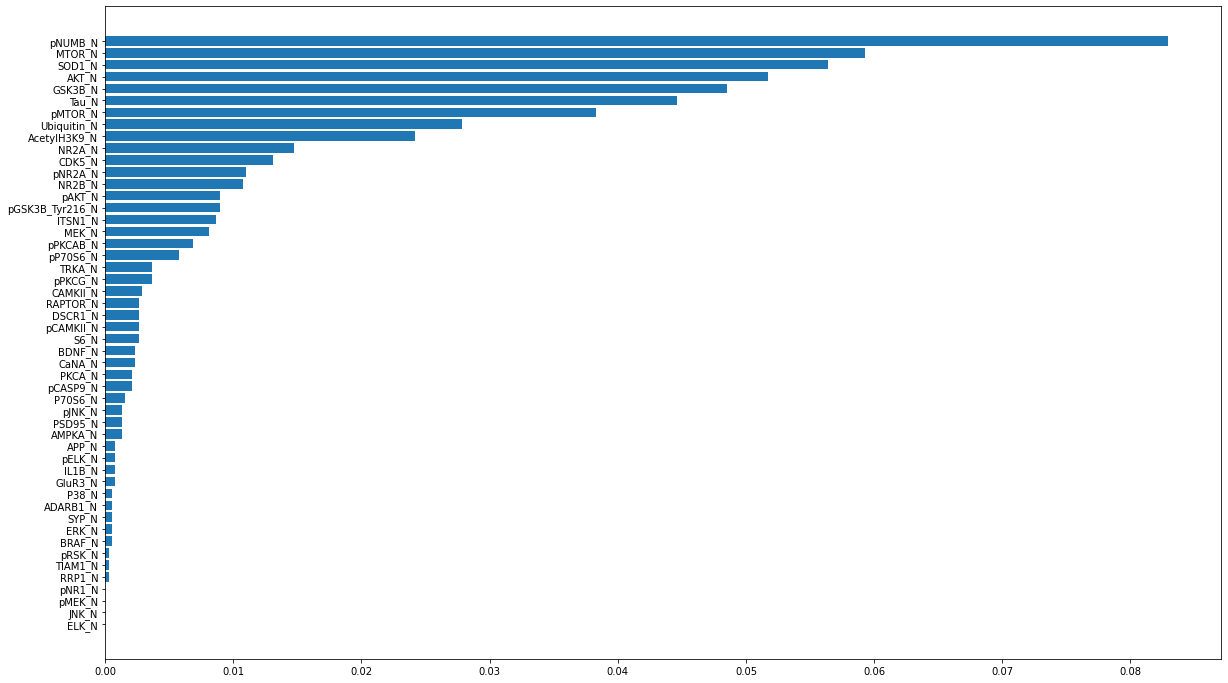

In [261]:
# this is result of part 6 for linear_svm

imp_feature(grid, X, y)

In [262]:
# now lets simmitercally remove features
from sklearn.svm import LinearSVC

  # define the model
model = LinearSVC()
print()
X_optimized = rem_sym_features(X, y, model)


grid_optimized = lin_svm()
grid_optimized.fit(X_optimized, y)




/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [263]:

print('old cv score:', grid.best_score_)
print('new cv score:', grid_optimized.best_score_)

old cv score: 0.877751977984176
new cv score: 0.9289731682146541


In [264]:
# testing the data
# rsult of part 8from sklearn.metrics import accuracy_score
X_test, y_test = getXy(dataset1_test)
print(len(X_test))
y_predict = grid.predict(X_test)
print(len(y_predict))
print ('accuracy: ', accuracy_score(y_test, y_predict))

225
225
accuracy:  0.4577777777777778


5(b)

In [265]:
def svm_rbf( ):
 from sklearn.svm import SVC
 from sklearn.model_selection import GridSearchCV
 # define the model
 model = SVC(kernel = 'rbf' )

 # define the hyper-parameter grid
 param_grid = {'gamma' : [0.1, 1, 10], 'C' : [0.1, 1, 10, 100]}

 # perform grid search
 grid = GridSearchCV(model, param_grid, cv=5)
 return grid

In [266]:
X, y = getXy(dataset1)

grid_svm = svm_rbf( )
grid_svm.fit(X, y)

print("Best hyperparameters: ", grid_svm.best_params_)
print("Best cross-validation score: ", grid_svm.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 0.1}
Best cross-validation score:  0.8791967664258685


6. rbf krenel svm

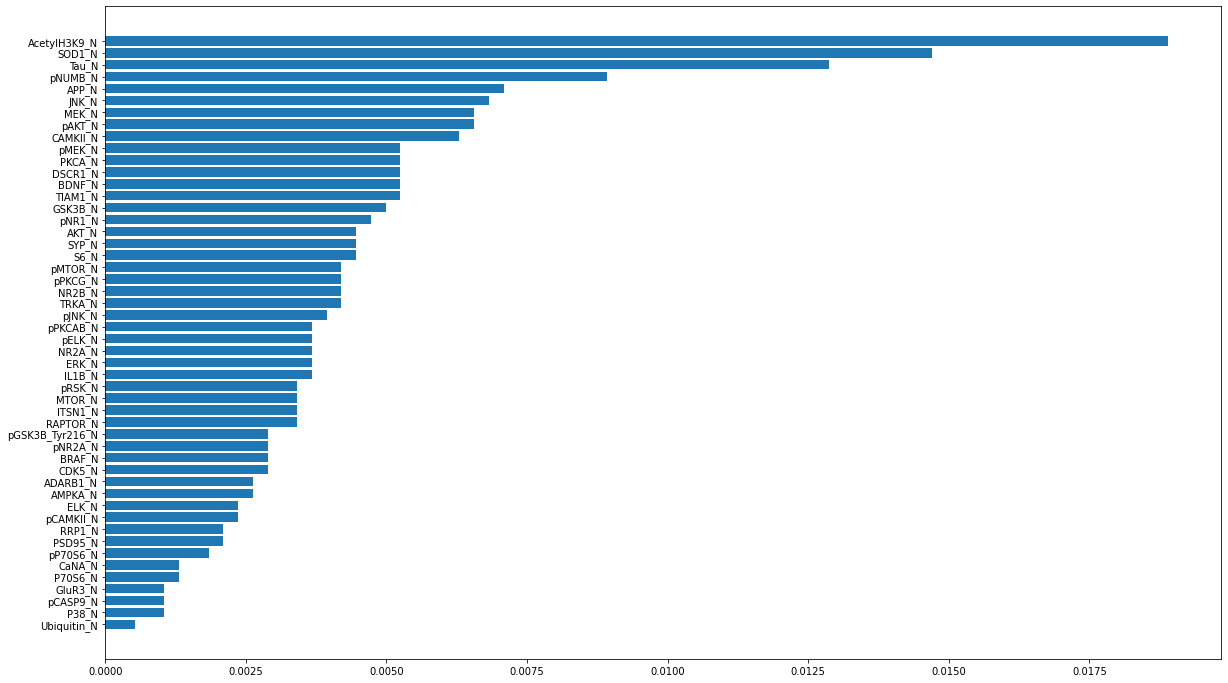

In [267]:
# this is result of part 6 for svm

imp_feature(grid_svm, X, y)

In [268]:
# testing the data
# rsult of part 8
X_test, y_test = getXy(dataset1_test)
y_prediction = grid_svm.predict(X_test)
print ('accuracy: ', accuracy_score(y_test, y_predict))

accuracy:  0.4577777777777778


5(c)

In [274]:
def nn( ):
 from sklearn.neural_network import MLPClassifier
 from sklearn.model_selection import GridSearchCV
 model = MLPClassifier(activation='relu', solver='adam', random_state=1)


 param_grid= {
    'hidden_layer_sizes': [(5,), (10,), (20,), (30,), (40,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]
 }

 grid = GridSearchCV(model, param_grid, cv=5)
 return grid

In [275]:
X, y = getXy(dataset1)

grid_nn = nn( )
grid_nn.fit(X, y)

print("Best hyperparameters: ", grid_nn.best_params_)
print("Best cross-validation score: ", grid_nn.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Best hyperparameters:  {'alpha': 0.0001, 'hidden_layer_sizes': (40,)}
Best cross-validation score:  0.9211472308221536


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

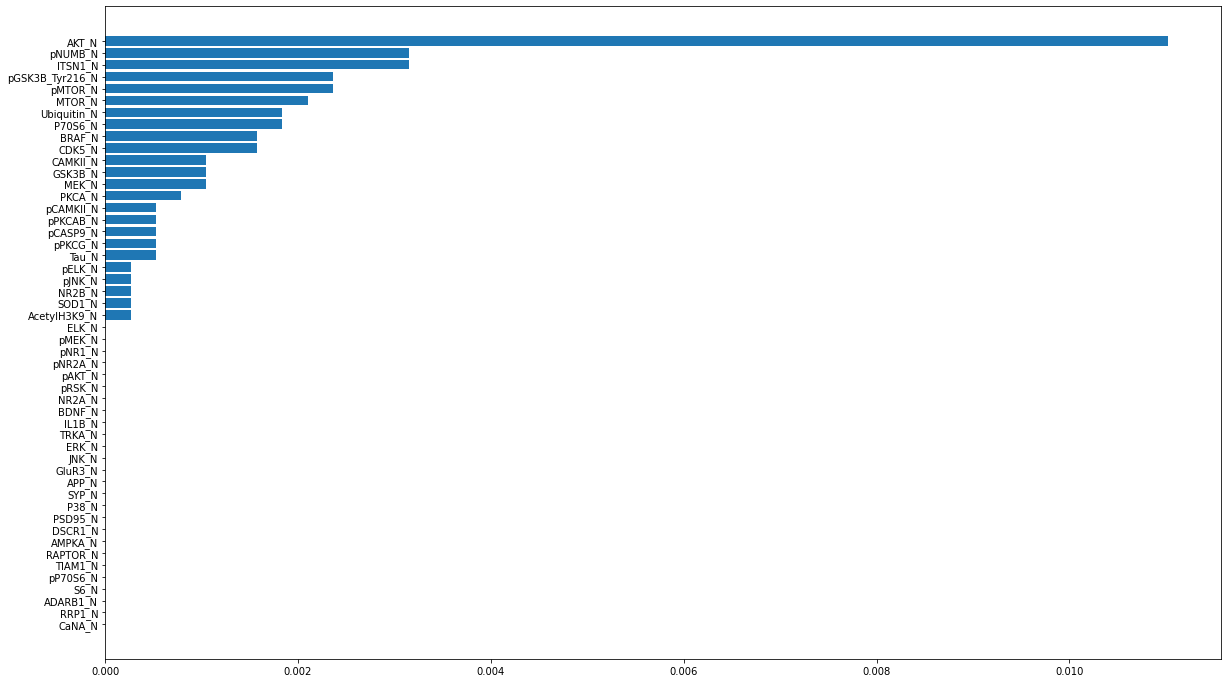

In [276]:
# this is result of part 6 for neural networks
imp_feature(grid_nn, X, y)

In [277]:
# testing the data

X_test, y_test = getXy(dataset1_test)
y_prediction = grid_nn.predict(X_test)
print ('accuracy: ', accuracy_score(y_test, y_predict))

accuracy:  0.4577777777777778


5(d)

In [278]:
def random_forest():
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import GridSearchCV
 model = RandomForestClassifier()


 param_grid= {
    'max_features': [2, 4, 8, 16, 24, 32],
    'max_depth': [5, 10, 15, 20, 25]
 }

 grid = GridSearchCV(model, param_grid, cv=5)
 return grid

In [279]:
X, y = getXy(dataset1)

grid_rf = random_forest( )
grid_rf.fit(X, y)

print("Best hyperparameters: ", grid_rf.best_params_)
print("Best cross-validation score: ", grid_rf.best_score_)

Best hyperparameters:  {'max_depth': 10, 'max_features': 4}
Best cross-validation score:  0.8988906088751291


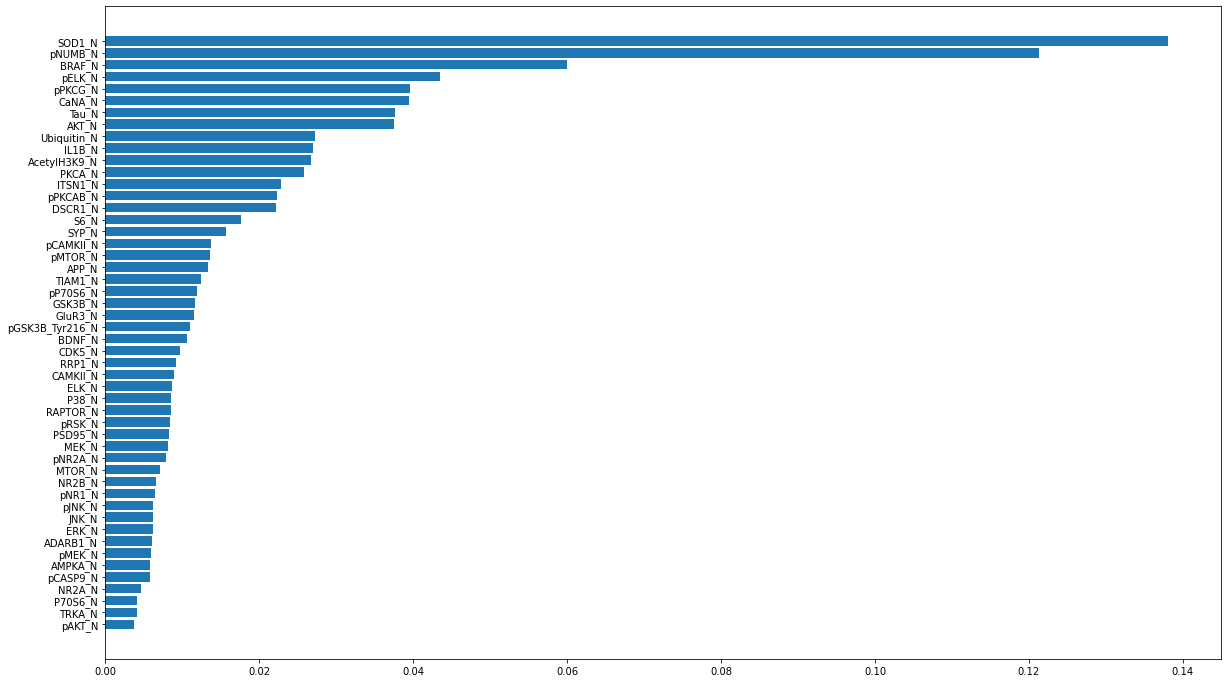

In [280]:
# this is result of part 6 for random forest


from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier()
model.fit(X,y)
result = model.feature_importances_

names = X.columns

names = names.to_numpy()

names = np.array(names)

sorted_idx = result.argsort()
plt.figure(figsize=(20,12))
plt.barh(names[sorted_idx], result[sorted_idx])
plt.show()

In [281]:
# now lets simmitercally remove features

# this gives the result for part 7
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier()

X_optimized = rem_sym_features(X, y, model)


grid_optimized = random_forest()
grid_optimized.fit(X_optimized, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_features': [2, 4, 8, 16, 24, 32]})

In [282]:
print('old cv score:', grid_rf.best_score_)
print('new cv score:', grid_optimized.best_score_)

old cv score: 0.8988906088751291
new cv score: 0.8989508083935327


In [294]:
# testing the data
# rsult of part 8
X_test, y_test = getXy(dataset1_test)
y_prediction = grid_rf.predict(X_test)
print ('accuracy: ', accuracy_score(y_test, y_predict))

accuracy:  0.4577777777777778


# 9.

in this part just have to copy paste the part  from the given link


In [295]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [285]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


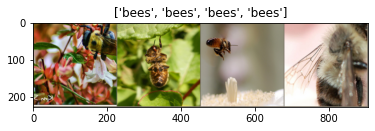

In [286]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [287]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [288]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [289]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [290]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7279 Acc: 0.6639
val Loss: 0.2377 Acc: 0.9085

Epoch 1/24
----------
train Loss: 0.4174 Acc: 0.8156
val Loss: 0.1953 Acc: 0.9477

Epoch 2/24
----------
train Loss: 0.5891 Acc: 0.7746
val Loss: 0.1982 Acc: 0.9281

Epoch 3/24
----------
train Loss: 0.4797 Acc: 0.7705
val Loss: 0.2284 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.5548 Acc: 0.7664
val Loss: 0.2562 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.4450 Acc: 0.7951
val Loss: 0.2108 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.4834 Acc: 0.7787
val Loss: 0.2130 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.2472 Acc: 0.9016
val Loss: 0.2141 Acc: 0.9412

Epoch 8/24
----------
train Loss: 0.2922 Acc: 0.8607
val Loss: 0.2048 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.3401 Acc: 0.8566
val Loss: 0.2282 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.3891 Acc: 0.8238
val Loss: 0.2313 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3849 Acc: 0.8197
val Loss: 0.1966 Acc: 0.9281

Ep

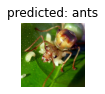

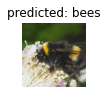

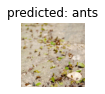

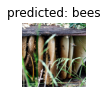

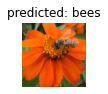

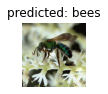

In [291]:
visualize_model(model_conv)

plt.ioff()
plt.show()

10.

In [292]:
# in this part to make function to extract feature from images

def extractFeature(img_data):
  # model as resnet18
  resnet = torchvision.models.resnet18(pretrained=True)

  # extracting hidden layer coeff except the last 
  feature_extract = torch.nn.Sequential(*(list(resnet.children())[:-1]))

  output = []
  target = []

  # making the data for whole data i.e for traing and validation
  for inputs, labels in dataloaders[img_data]:
     out = feature_extract(inputs)
     target.append(labels)
     output.append(out)

# out = resnet(image_datasets['train'])
# concatinating the batch size
  output = torch.cat(output)
  target = torch.cat(target)

# squezzing the data so to reduce the tensor 
  target = np.squeeze(target)

# now converting to array
  target = np.array(target)

# squezzing the data so to reduce the tensor
  output = np.squeeze(output)

# now converting to array
  output = output.detach().numpy()
  output = np.array(output)

# returns data and target seperatoly
  return output, target





# 11

In [296]:
# giving name to every feature 

column = ['features_'+ str(i) for i  in range(512)]

# for i in range (512): 
# columns.append('feature_1'+ str(i))

# extracted feature dataset 
output_train, target_train = extractFeature('train')

# converting to dataframe
x_train = pd.DataFrame(output_train, columns = column)
y_train = pd.DataFrame(target_train, columns = ['target'])

# extracted feature dataset 

output_test, target_test = extractFeature('val')

# converting to dataframe
x_test = pd.DataFrame(output_test, columns = column)
y_test = pd.DataFrame(target_test, columns = ['target'])

model_score = [] 
model_acc_score = []

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = [LogisticRegression(penalty='l2'), SVC(), MLPClassifier(),RandomForestClassifier() ]
paramGrid_list = [  {   'C': [0.1, 1, 10,100,1000]},
                {   'C': [0.1, 1, 10, 100, 1000],
			        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			        'kernel': ['rbf']},
                {   'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,)],
                    'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1]},
                {   'max_features': [2, 4, 8, 16, 24, 32],
                    'max_depth': [5, 10, 15, 20, 25]}
                ]

from sklearn import metrics

for i in range (4):
    grid = GridSearchCV(model[i], paramGrid_list[i],cv = 5)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    model_score.append(metrics.f1_score(y_pred, y_test))
    model_acc_score.append(metrics.accuracy_score(y_pred, y_test))
print('f1_score:', model_score)
print('accuracy_score:', model_acc_score)



/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worke

f1_score: [0.7564102564102564, 0.84472049689441, 0.8024691358024693, 0.7924528301886792]
accuracy_score: [0.7516339869281046, 0.8366013071895425, 0.7908496732026143, 0.7843137254901961]



f1_score: [0.7564102564102564, 0.84472049689441, 0.8024691358024693, 0.7924528301886792]
accuracy_score: [0.7516339869281046, 0.8366013071895425, 0.7908496732026143, 0.7843137254901961]




# 12.
new learnings - 
1. learnt to use sklearn librabries
2. to use pre trained model
3. solved errors efficiently



refrences:
1. https://scikit-learn.org/stable/modules/svm.html#svm-classification
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
4. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
5. https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe
6. https://stackoverflow.com/questions/52548174/how-to-remove-the-last-fc-layer-from-a-resnet-model-in-pytorch
7. https://youtu.be/Ato-hcv0NK0
8. https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
9. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
10. https://scikit-learn.org/stable/modules/neural_networks_supervised.html